## Online Customers intentions prediction
#### This dataset contains 18 columns and 12,330 rows. The main objective of this notebook is to do
1. Data analysis on the data we obtained from kaggle and then get a clear idea on how many missing values/outliers are there.

2. what's the correlation between the features in the dataset

3. Cleaning the data and

4. Visualizing the data

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import sklearn
import matplotlib.pyplot as plt

In [2]:
# loading the data and seeing the frst 5 rows of the datset with head() command
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Shape of the datset (no.of rows, no.of columns)
df.shape

(12330, 18)

In [4]:
# datatypes of the features in the dataset
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
# Percentage of missing values in each column/feature
df.isna().sum()/df.shape[0] * 100

Administrative             0.113544
Administrative_Duration    0.113544
Informational              0.113544
Informational_Duration     0.113544
ProductRelated             0.113544
ProductRelated_Duration    0.113544
BounceRates                0.113544
ExitRates                  0.113544
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

In [6]:
# Count of missing values in the datset
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [7]:
# Get the empty rows and cols
df[df.isna().any(axis = 1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


In [8]:
# let's drop all the null values
df.dropna(inplace = True)

In [9]:
# now let's see if there is any null values exist in our data
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
# Get column names in the dataset
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [12]:
# count of each month in Month - feature
df.Month.value_counts()

May     3363
Nov     2998
Mar     1894
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [15]:
# getting unique values in month column
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [16]:
# taking categorical columns from the dataset and assigning proper dtypes to them
cat_cols = ['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
numeric_cols = list(set(df.columns) - set(cat_cols+['Month']))
cat_dtype = pd.api.types.CategoricalDtype(categories = ['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], ordered = True)

In [18]:
numeric_cols

['BounceRates',
 'SpecialDay',
 'PageValues',
 'Administrative_Duration',
 'ExitRates',
 'ProductRelated',
 'Informational',
 'Informational_Duration',
 'ProductRelated_Duration',
 'Administrative']

In [19]:
cat_cols

['OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [22]:
# changing cat_cols's dtype as category
df[cat_cols] = df[cat_cols].astype('category')

In [23]:
df.dtypes

Administrative              float64
Administrative_Duration     float64
Informational               float64
Informational_Duration      float64
ProductRelated              float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

In [24]:
# changing dtype into int
df[
    ['Administrative','Informational','ProductRelated']
  ] = df[['Administrative','Informational','ProductRelated']].astype('int')

In [25]:
df.dtypes

Administrative                int32
Administrative_Duration     float64
Informational                 int32
Informational_Duration      float64
ProductRelated                int32
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

In [26]:
df['Month'] = df.Month.astype(cat_dtype)
cat_cols += ['Month']

In [27]:
df.dtypes

Administrative                int32
Administrative_Duration     float64
Informational                 int32
Informational_Duration      float64
ProductRelated                int32
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

In [31]:
df[cat_cols]

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month
0,1,1,1,1,Returning_Visitor,False,False,Feb
1,2,2,1,2,Returning_Visitor,False,False,Feb
2,4,1,9,3,Returning_Visitor,False,False,Feb
3,3,2,2,4,Returning_Visitor,False,False,Feb
4,3,3,1,4,Returning_Visitor,True,False,Feb
...,...,...,...,...,...,...,...,...
12325,4,6,1,1,Returning_Visitor,True,False,Dec
12326,3,2,1,8,Returning_Visitor,True,False,Nov
12327,3,2,1,13,Returning_Visitor,True,False,Nov
12328,2,2,3,11,Returning_Visitor,False,False,Nov


In [33]:
# Getting description about the cat_Cols
df[cat_cols].describe()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month
count,12316,12316,12316,12316,12316,12316,12316,12316
unique,8,13,9,20,3,2,2,10
top,2,2,1,2,Returning_Visitor,False,False,May
freq,6593,7951,4774,3909,10537,9451,10408,3363


In [34]:
# description of numeric columns
df[numeric_cols].describe()

,BounceRates,SpecialDay,PageValues,Administrative_Duration,ExitRates,ProductRelated,Informational,Informational_Duration,ProductRelated_Duration,Administrative
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,0.022152,0.061497,5.895952,80.906176,0.043003,31.763884,0.503979,34.506387,1196.037057,2.317798
std,0.048427,0.199020,18.577926,176.860432,0.048527,44.490339,1.270701,140.825479,1914.372511,3.322754
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.014286,7.000000,0.000000,0.000000,185.000000,0.000000
50%,0.003119,0.000000,0.000000,8.000000,0.025124,18.000000,0.000000,0.000000,599.766190,1.000000
75%,0.016684,0.000000,0.000000,93.500000,0.050000,38.000000,0.000000,0.000000,1466.479902,4.000000
max,0.200000,1.000000,361.763742,3398.750000,0.200000,705.000000,24.000000,2549.375000,63973.522230,27.000000


In [37]:
# Since the duration has -1 values we cover them up by making least value as 0
df[numeric_cols] = df[numeric_cols].clip(lower = 0)

In [38]:
# now let's see the min values
df[numeric_cols].describe()

,BounceRates,SpecialDay,PageValues,Administrative_Duration,ExitRates,ProductRelated,Informational,Informational_Duration,ProductRelated_Duration,Administrative
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,0.022152,0.061497,5.895952,80.908856,0.043003,31.763884,0.503979,34.509067,1196.039736,2.317798
std,0.048427,0.199020,18.577926,176.859199,0.048527,44.490339,1.270701,140.824813,1914.370836,3.322754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.014286,7.000000,0.000000,0.000000,185.000000,0.000000
50%,0.003119,0.000000,0.000000,8.000000,0.025124,18.000000,0.000000,0.000000,599.766190,1.000000
75%,0.016684,0.000000,0.000000,93.500000,0.050000,38.000000,0.000000,0.000000,1466.479902,4.000000
max,0.200000,1.000000,361.763742,3398.750000,0.200000,705.000000,24.000000,2549.375000,63973.522230,27.000000


In [40]:
# checking True-False counts in Revenue column
df.Revenue.value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

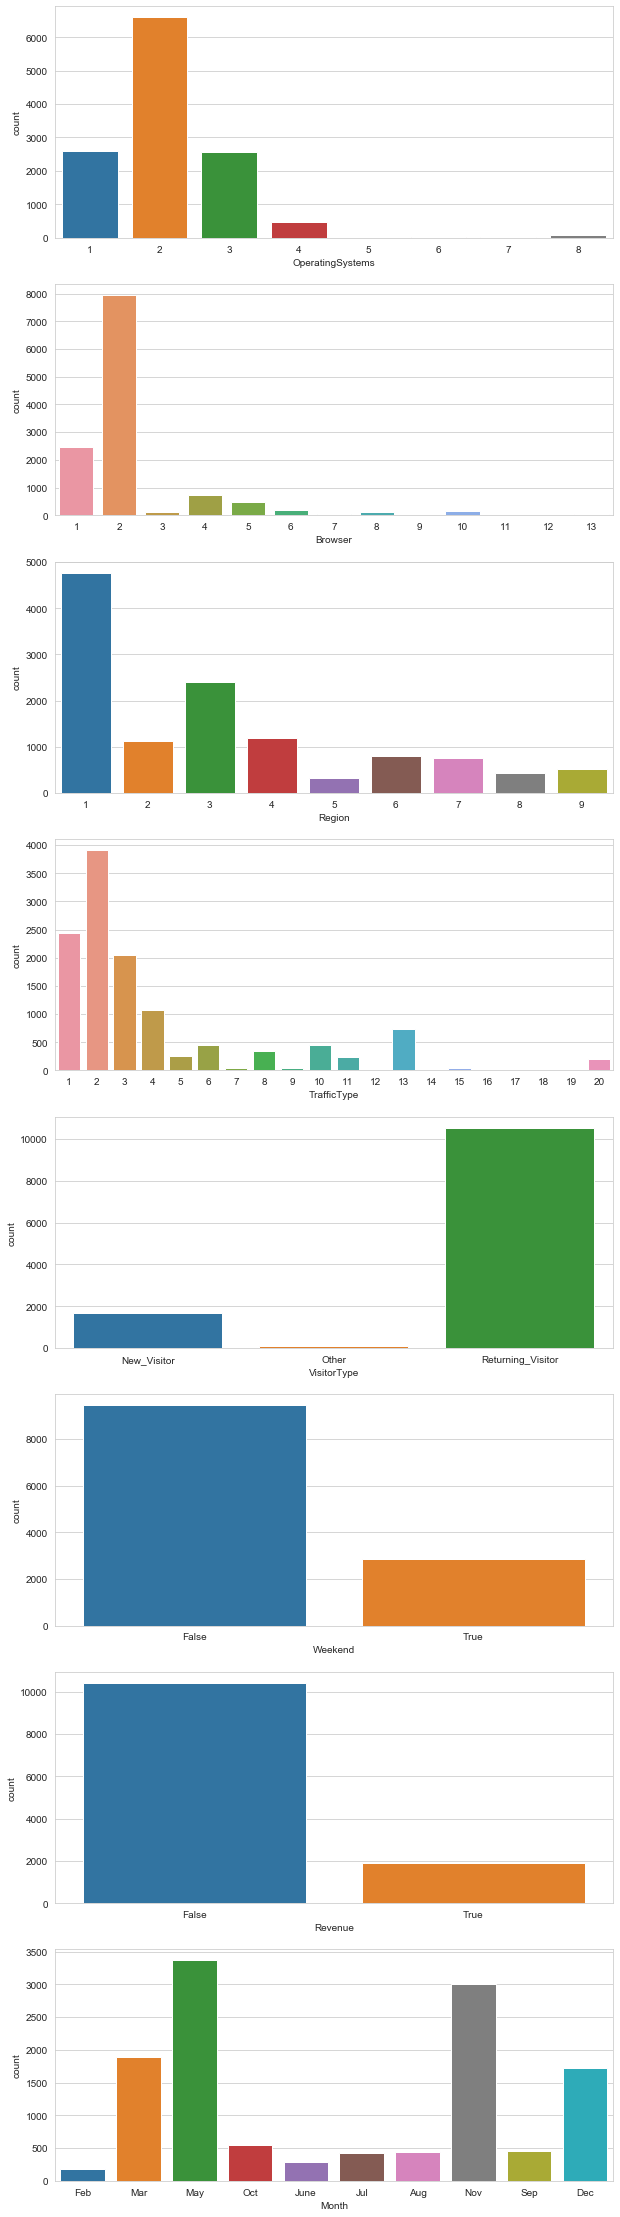

In [43]:
# let's look at the distribution of categorical variables
f, ax = plt.subplots(len(cat_cols), 1, figsize=(10,40))
for idx, col in enumerate(cat_cols):
    sns.countplot(x = col, data = df[cat_cols], ax = ax[idx])

#### From the above plots it is clear that :

1. The target variable Revenue is imbalanced. 
2. Data was not collected in the months of jan and april
3. The Data collected is not uniformly distributed among the months and Region
4. OperatingSystem, Browser, TrafficType apperas to have some categories missing

In [44]:
df['TrafficType'].value_counts()

2     3909
1     2444
3     2051
4     1069
13     737
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

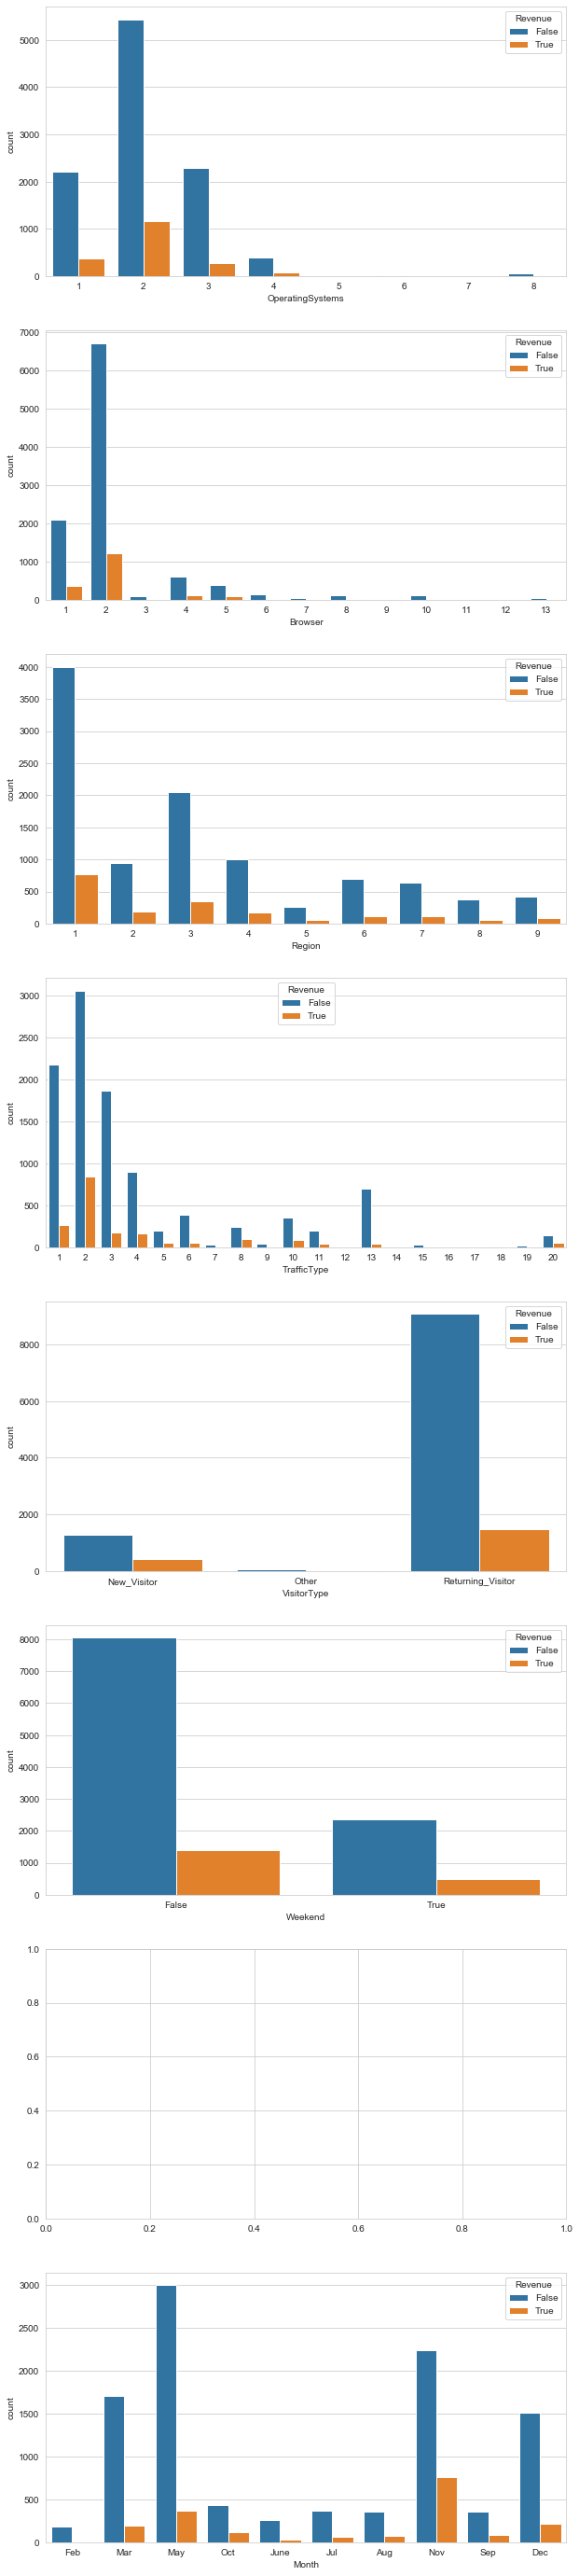

In [45]:
f,ax =plt.subplots(len(cat_cols),1,figsize=(10,50))
for idx,col in enumerate(cat_cols):
    if col!='Revenue':
        sns.countplot(x=col,data=df[cat_cols],hue='Revenue',ax=ax[idx])

C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


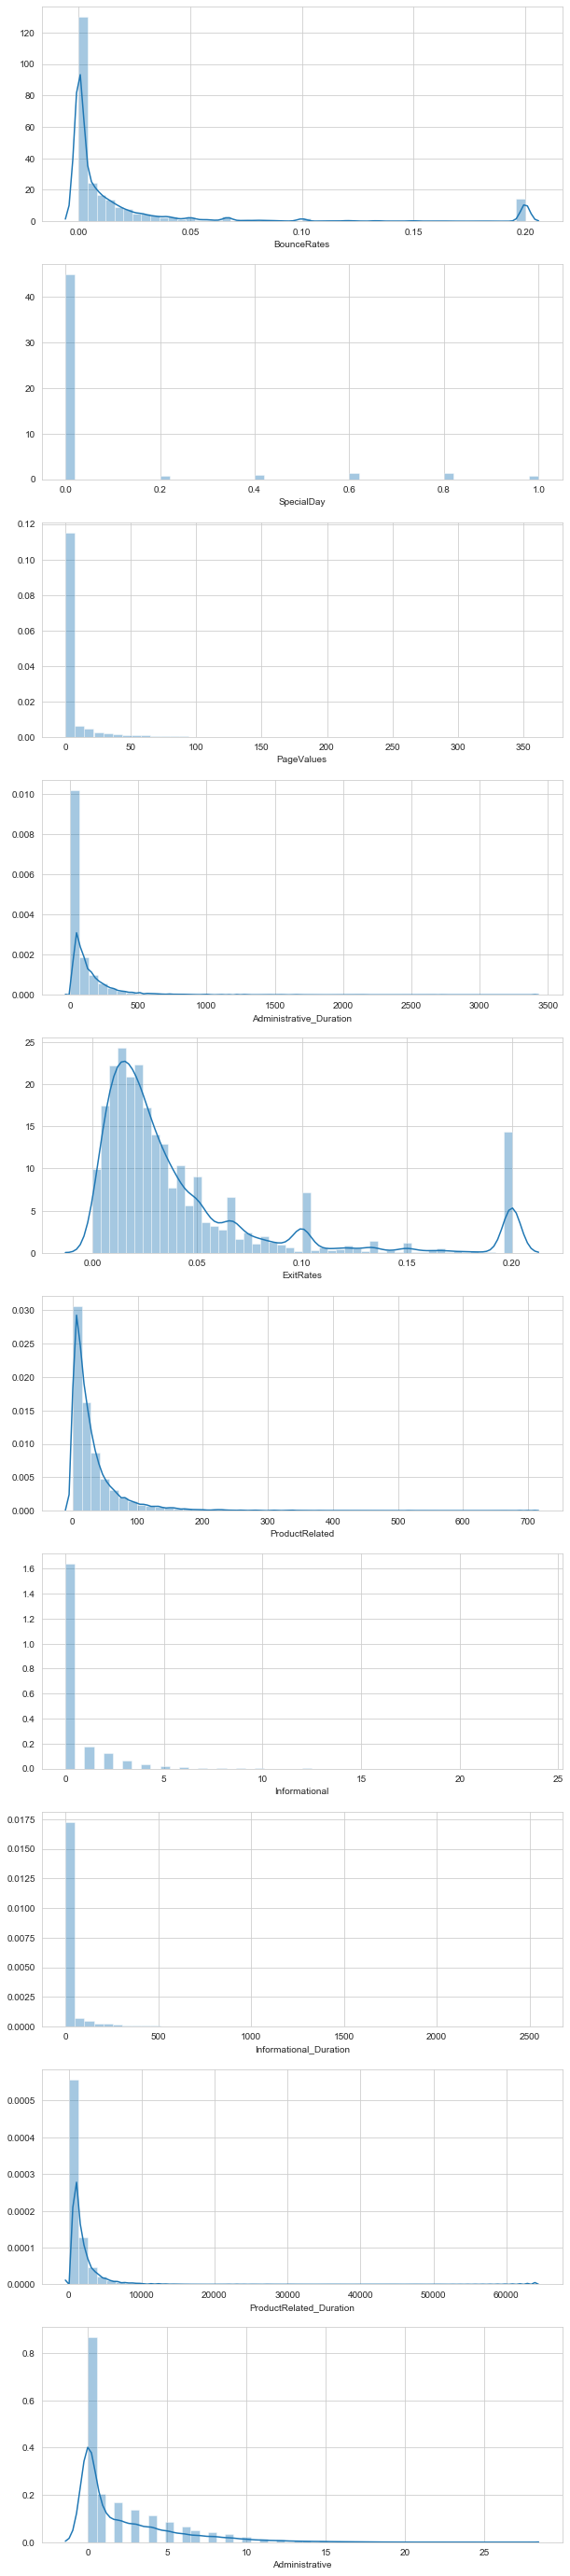

In [47]:
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.distplot(df[col],ax=ax[idx])

In [48]:
df[numeric_cols].min()

BounceRates                0.0
SpecialDay                 0.0
PageValues                 0.0
Administrative_Duration    0.0
ExitRates                  0.0
ProductRelated             0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated_Duration    0.0
Administrative             0.0
dtype: float64

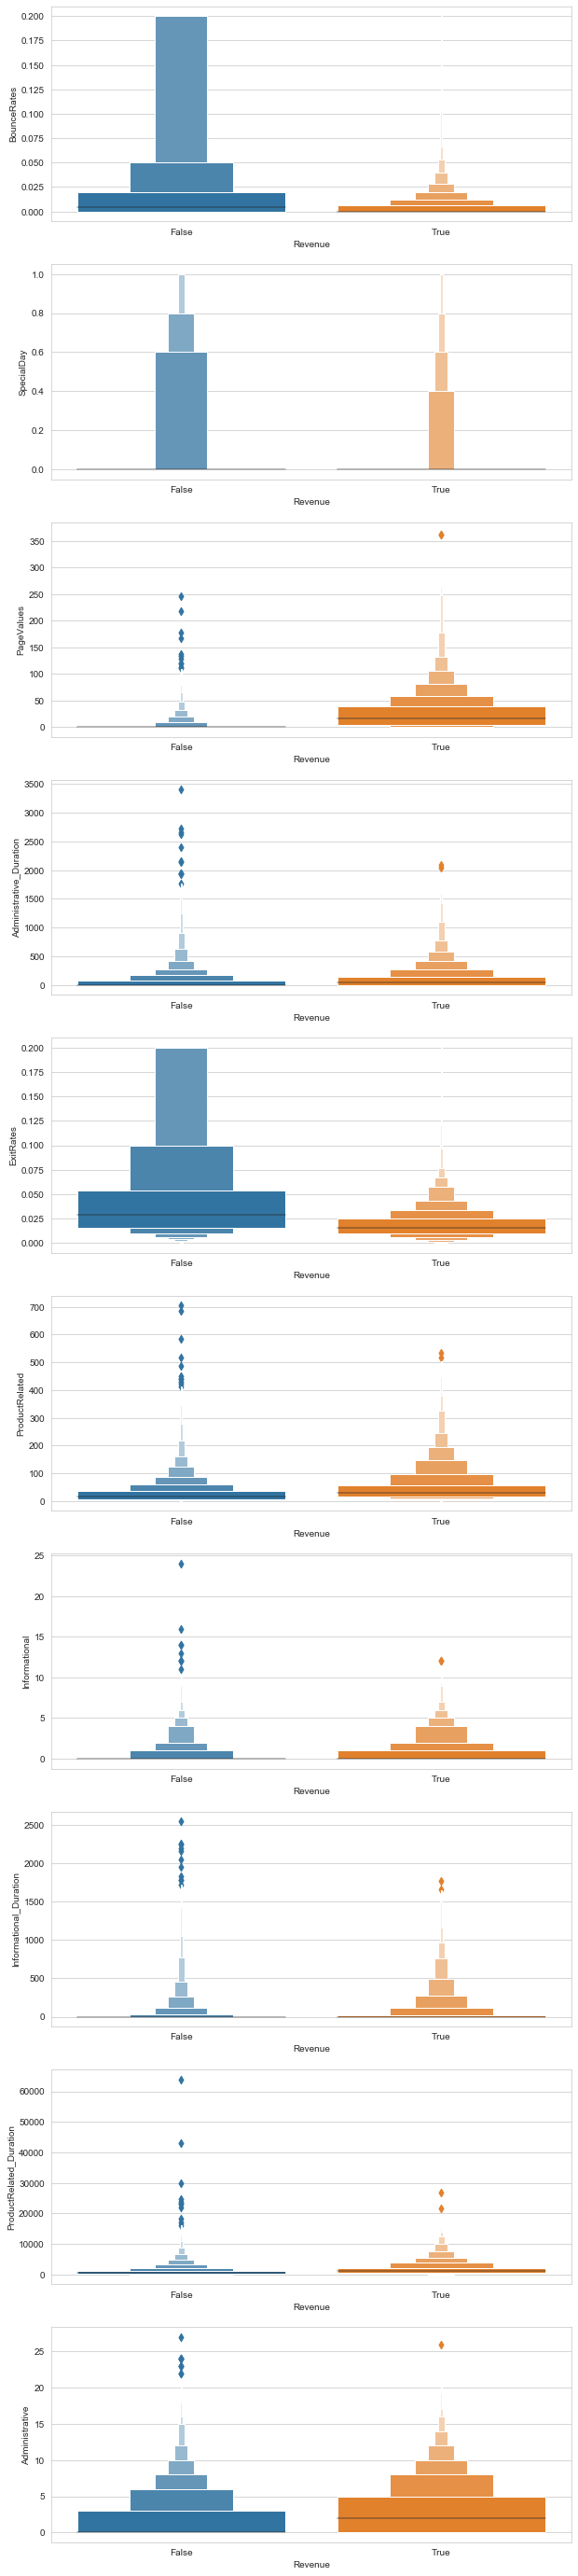

In [51]:
# let's use boxplots for outlier detection
f, ax = plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx, col in enumerate(numeric_cols):
    sns.boxenplot(y = col, x = 'Revenue', data=df[numeric_cols + ['Revenue']],ax=ax[idx])

In [52]:
# Now the outliers for columns are clipped
df['Administrative']=df['Administrative'].clip(upper=20)
df['PageValues']=df['PageValues'].clip(upper=250)
df['Administrative_Duration']=df['Administrative_Duration'].clip(upper=1500)
df['Informational']=df['Informational'].clip(upper=10)
df['ProductRelated_Duration']=df['ProductRelated_Duration'].clip(upper=20000)
df['ProductRelated']=df['ProductRelated'].clip(upper=600)
df['Informational_Duration']=df['Informational_Duration'].clip(upper=1500)

In [53]:
# To fix the skew various transforms can be applied. 
# To see if the transformation is useful multivariate analysis for the transfomration can be compared with 
# that of the original dataset.

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=True)
transformed_df = pd.DataFrame(pt.fit_transform(df[numeric_cols]),columns=numeric_cols)
transformed_df[cat_cols]=df[cat_cols]
transformed_df=transformed_df.dropna()
transformed_0 = transformed_df[transformed_df['Revenue']==0]
transformed_1 = transformed_df[transformed_df['Revenue']==1]
transformed_df.isna().sum()

BounceRates                0
SpecialDay                 0
PageValues                 0
Administrative_Duration    0
ExitRates                  0
ProductRelated             0
Informational              0
Informational_Duration     0
ProductRelated_Duration    0
Administrative             0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Month                      0
dtype: int64

C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning

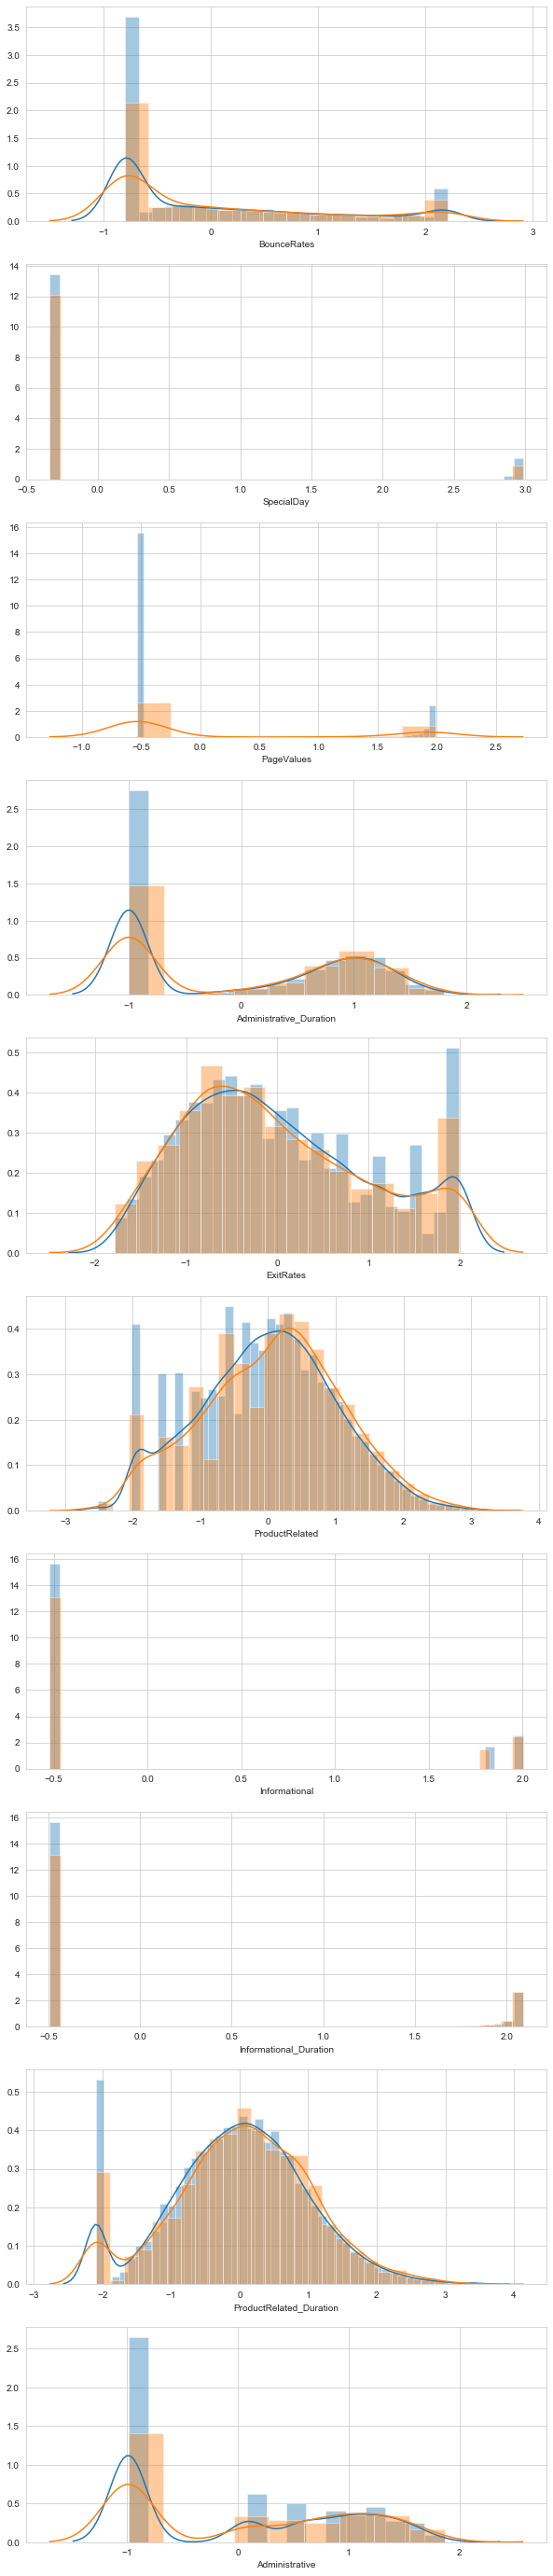

In [54]:
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.distplot(transformed_0[col],ax=ax[idx])
    sns.distplot(transformed_1[col],ax=ax[idx])

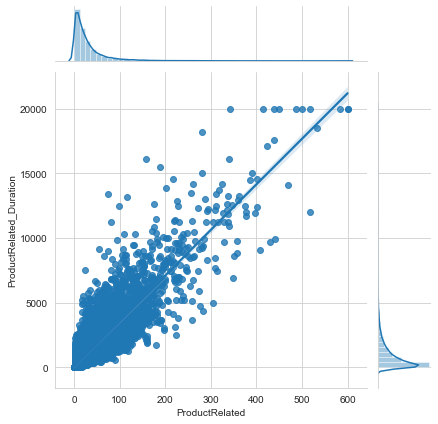

In [55]:
# Multivariate anaylsis
sns.jointplot(x="ProductRelated" ,y="ProductRelated_Duration",data=df[numeric_cols],kind="reg")

C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


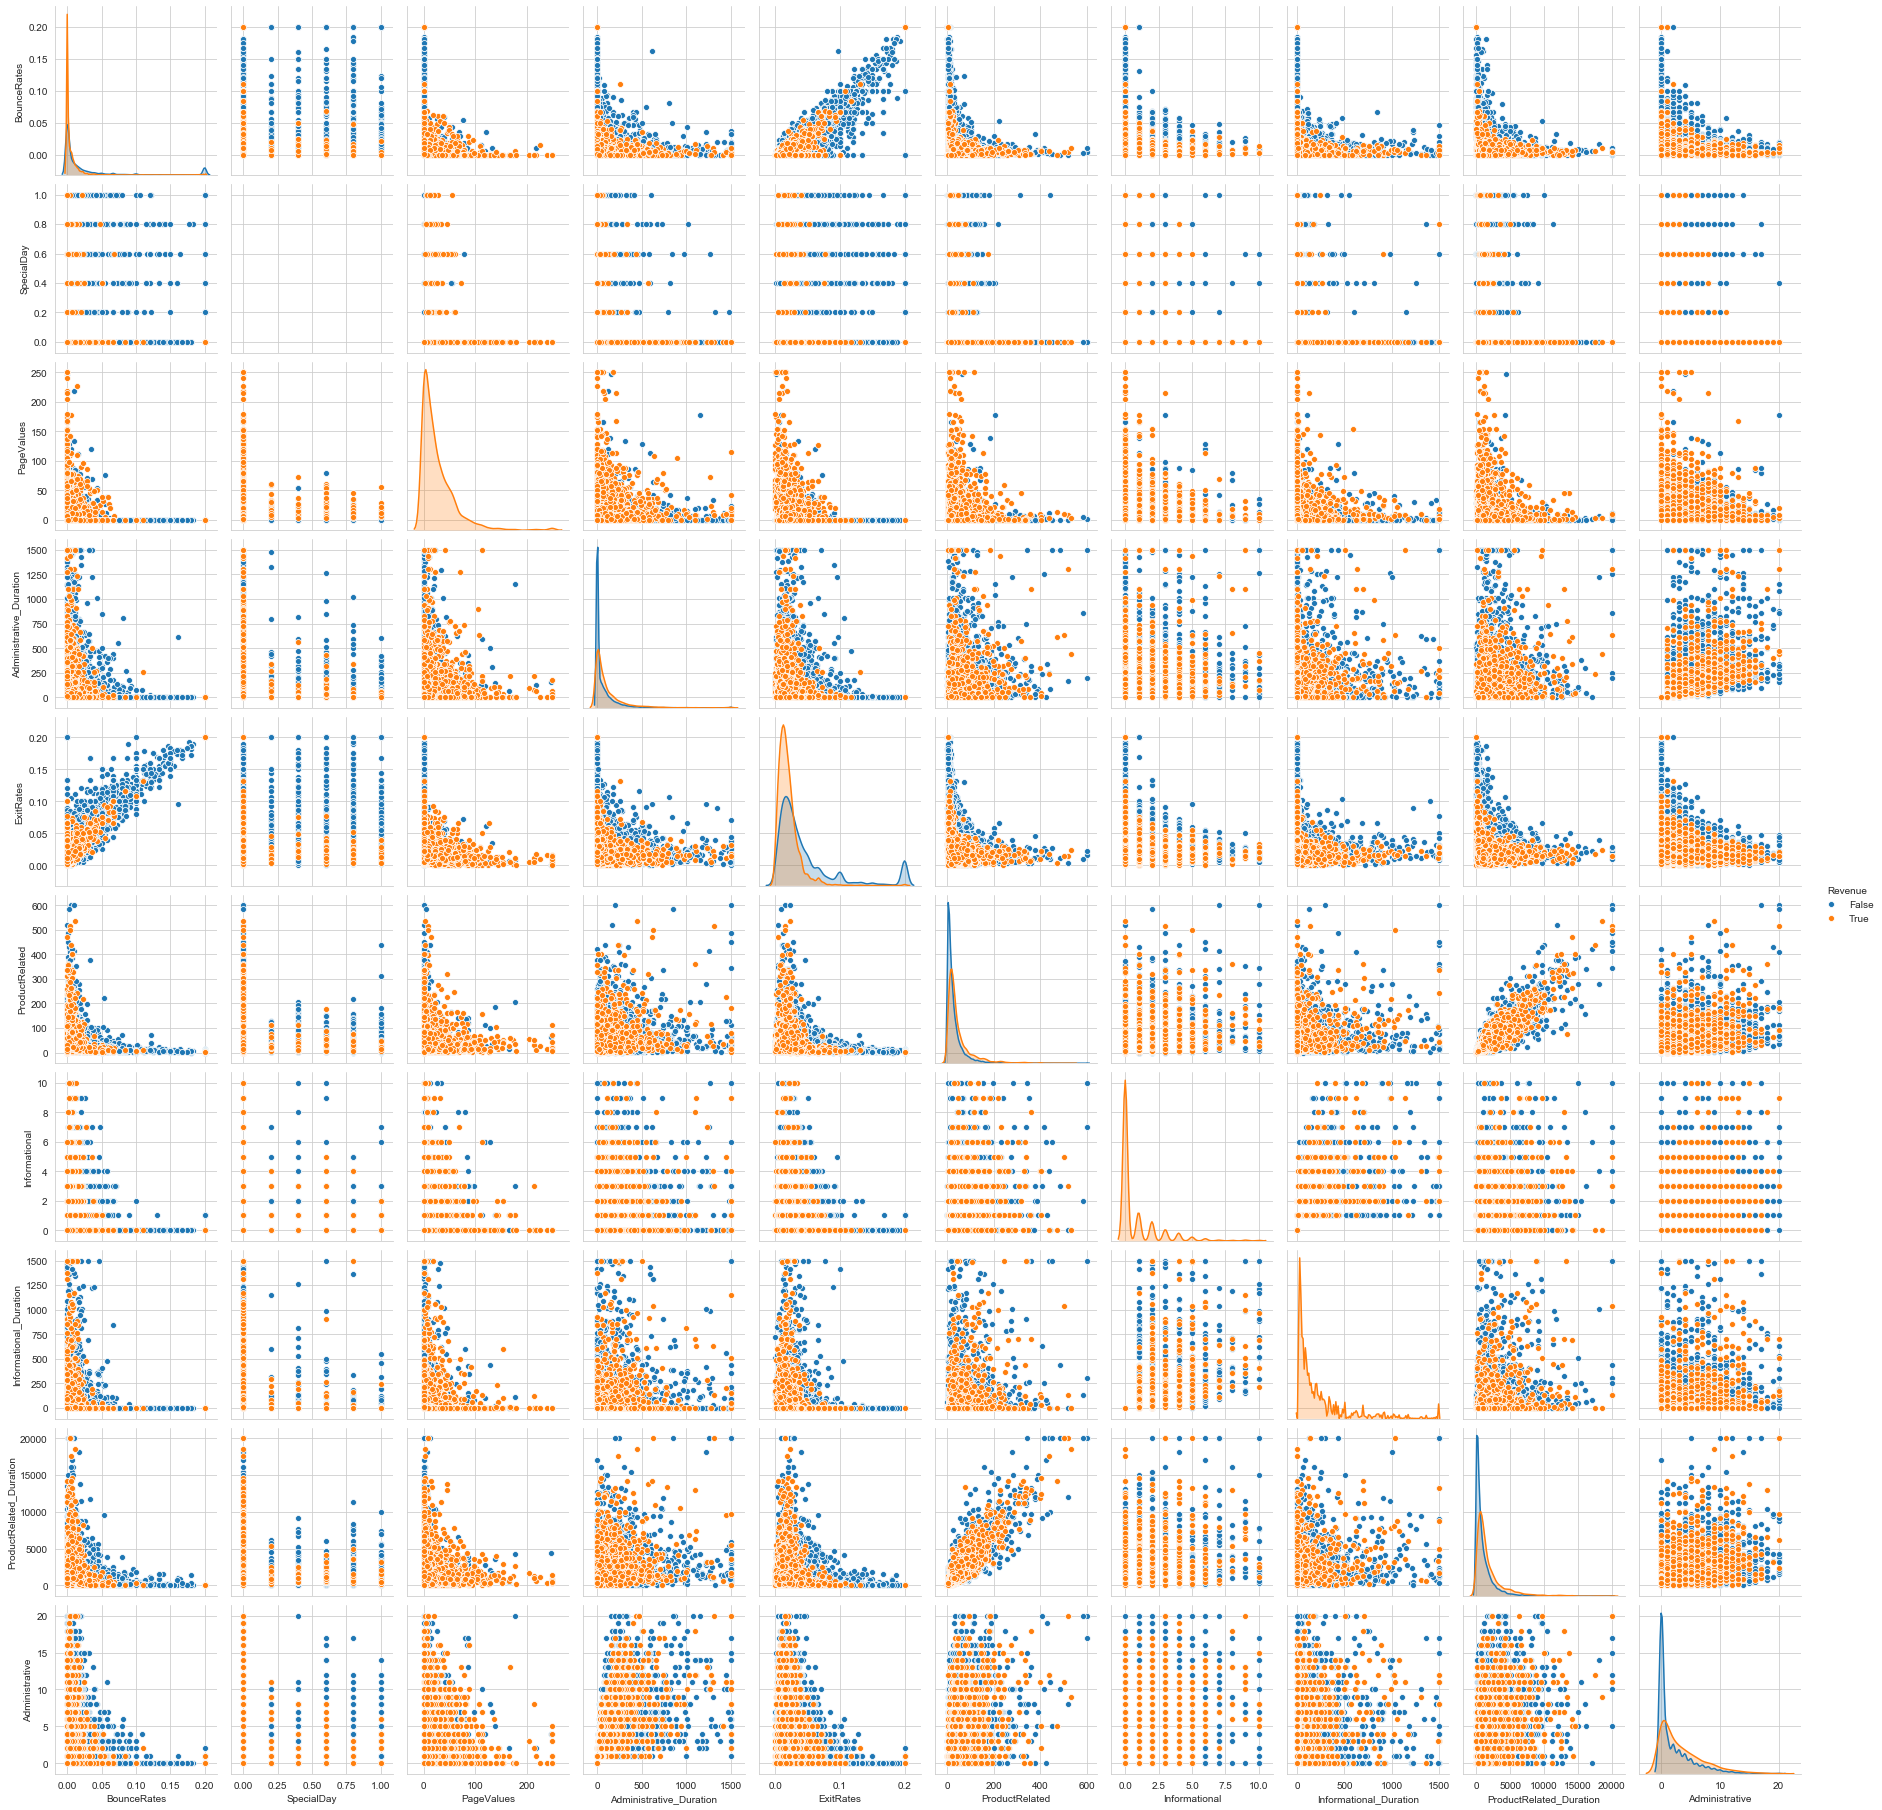

In [56]:
#pairplot for untransfromed dataset
sns.pairplot(df,vars=numeric_cols,hue='Revenue')

C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning

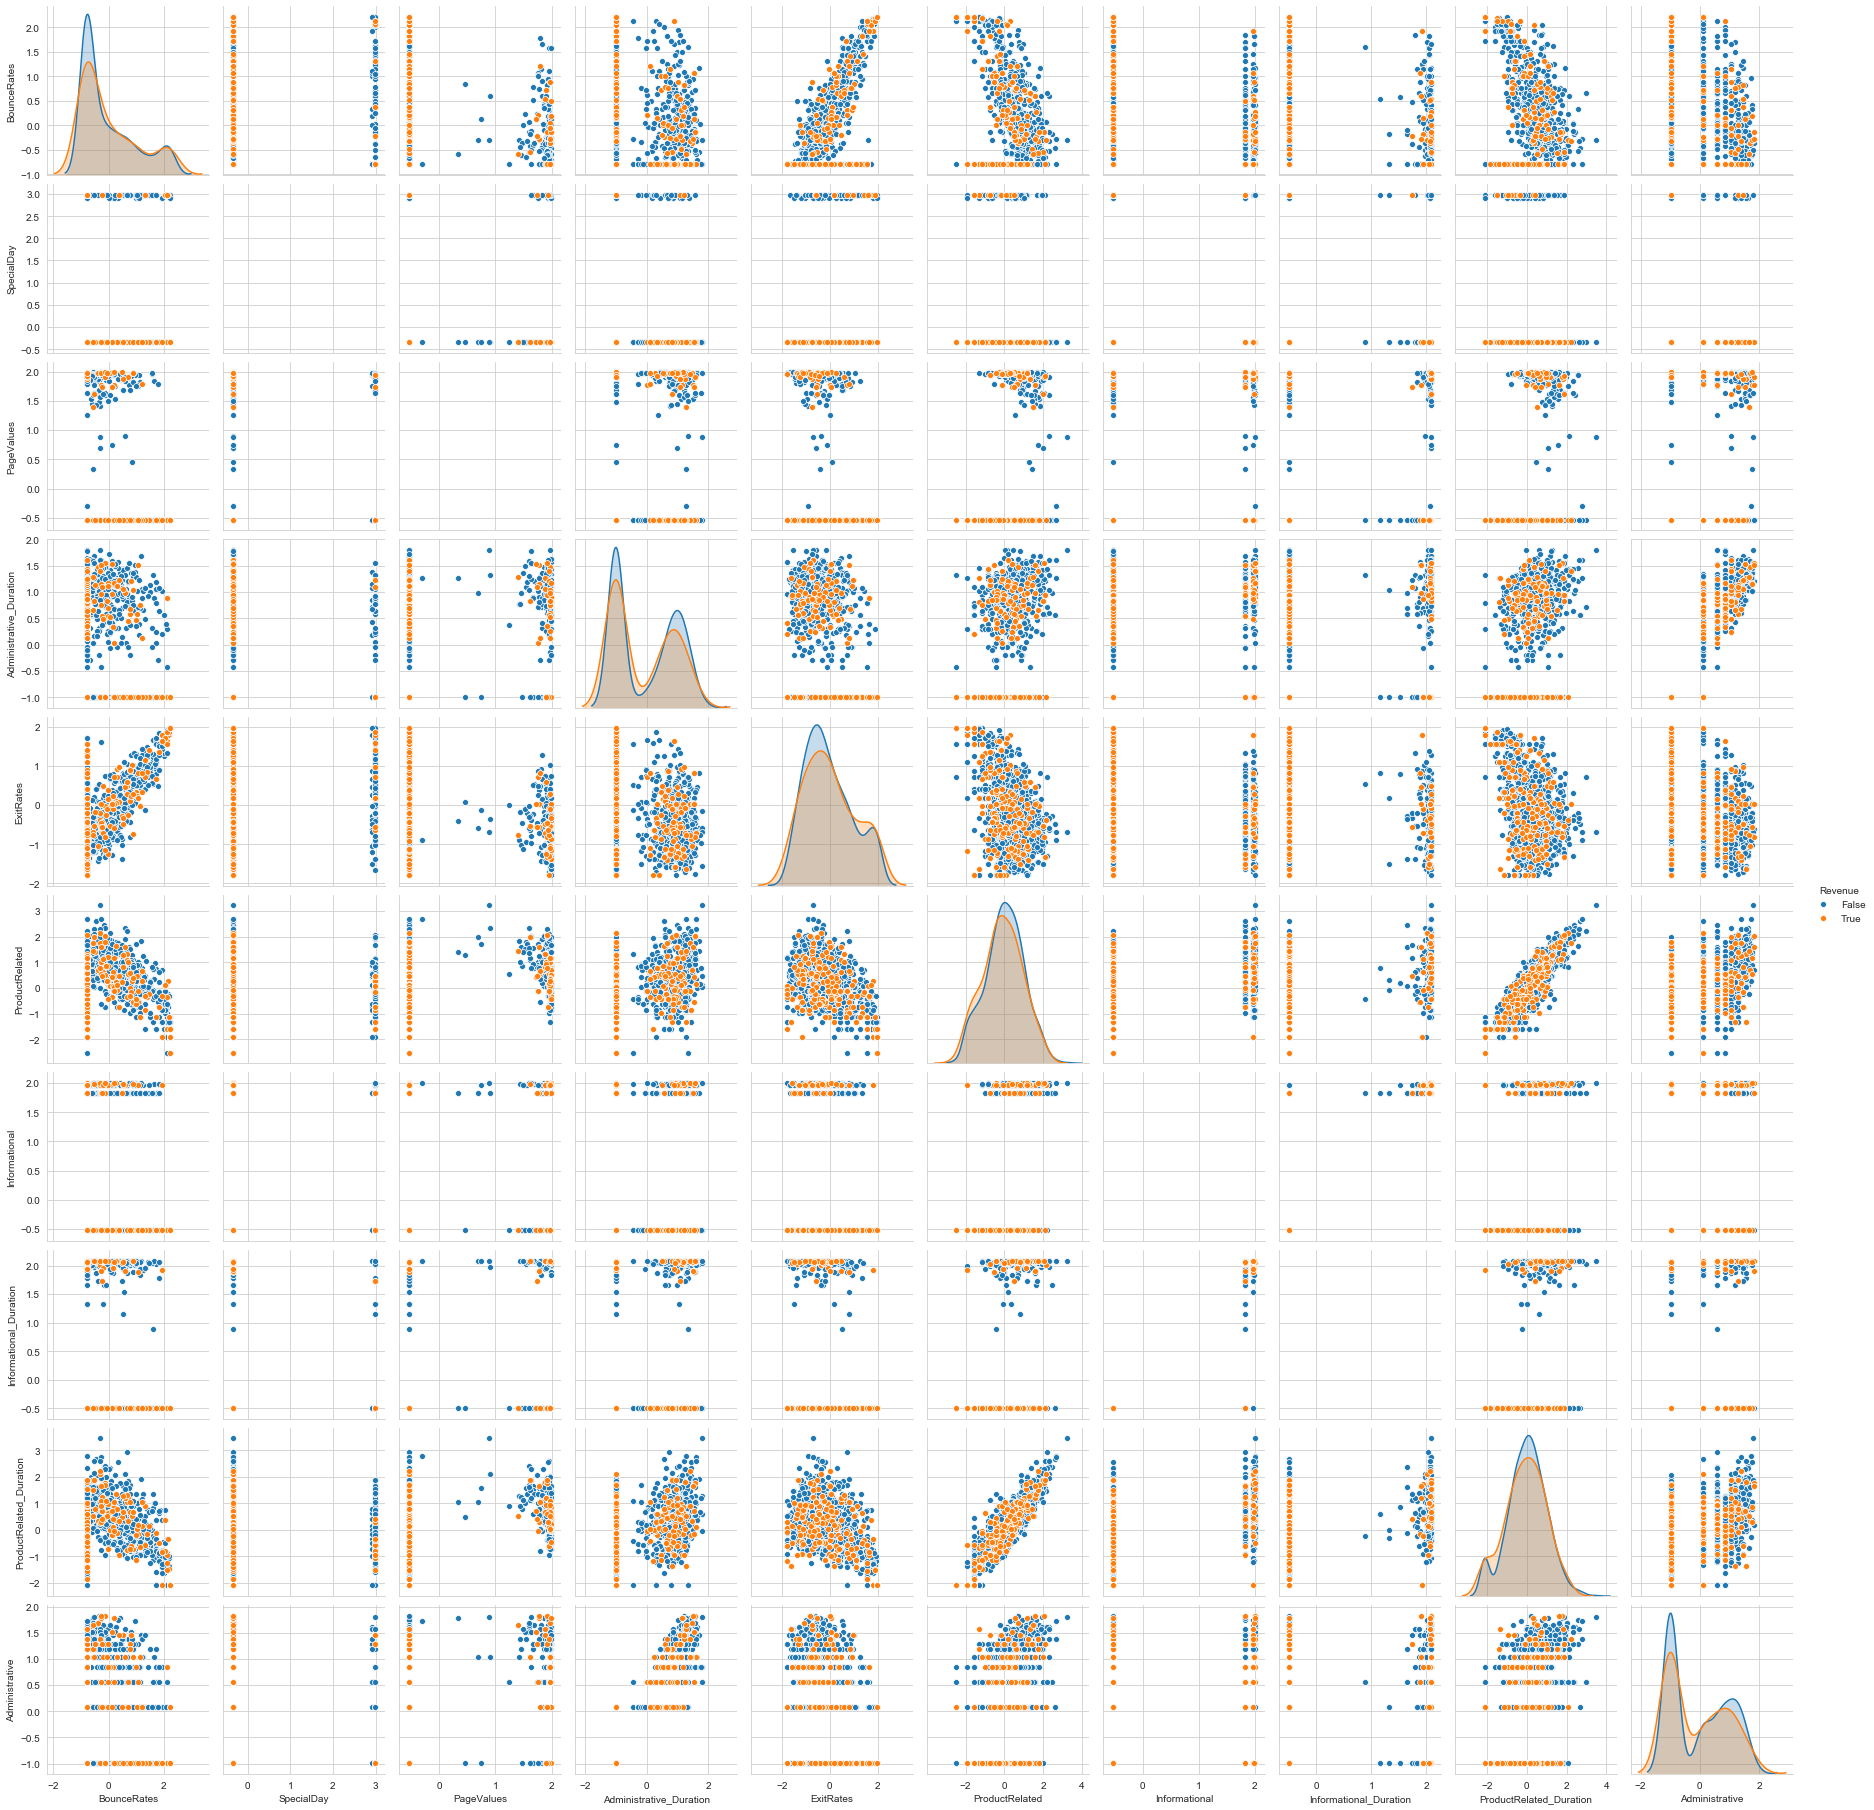

In [57]:
sns.pairplot(transformed_df.sample(frac=0.1),vars=numeric_cols,hue='Revenue')

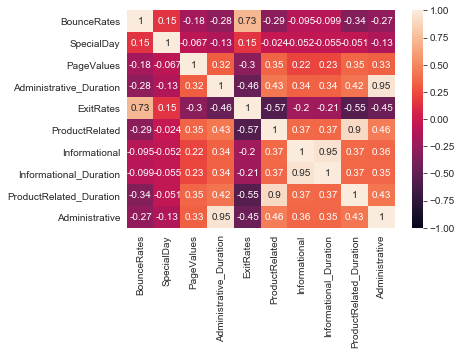

In [58]:
sns.heatmap(transformed_df[numeric_cols].corr(),annot=True,vmin=-1,vmax=1)

In [59]:
from scipy.stats import f_oneway
for col in numeric_cols:
    print(col,f_oneway(df[col],df['Revenue']))

BounceRates F_onewayResult(statistic=1628.938326563153, pvalue=0.0)
SpecialDay F_onewayResult(statistic=630.3098595619027, pvalue=2.2852092732324047e-137)
PageValues F_onewayResult(statistic=1216.5860735007025, pvalue=3.224422043821183e-260)
Administrative_Duration F_onewayResult(statistic=2843.475576461068, pvalue=0.0)
ExitRates F_onewayResult(statistic=1157.4051646289086, pvalue=6.010190087008823e-248)
ProductRelated F_onewayResult(statistic=6270.749778903707, pvalue=0.0)
Informational F_onewayResult(statistic=888.028198982605, pvalue=9.93026727052001e-192)
Informational_Duration F_onewayResult(statistic=789.6001875807722, pvalue=4.90949434563493e-171)
ProductRelated_Duration F_onewayResult(statistic=5543.960716979227, pvalue=0.0)
Administrative F_onewayResult(statistic=5210.31019513269, pvalue=0.0)
